In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraa1z","key":"c15ae290af9ccd1301d4eb84408fd746"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 43.2MB/s]


In [5]:
!ls

drive  kaggle.json  mobile-price-classification.zip  sample_data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('mobile-price-classification.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df=pd.read_csv('/content/files/train.csv')
test=pd.read_csv('/content/files/test.csv')

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.shape

(2000, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# check for missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
# check outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
res = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
res

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std = StandardScaler()
X=df.drop(['price_range'], axis=1)
y=df['price_range']
scaled_df = df.copy()
scaled_df[X.columns] = std.fit_transform(X)

In [14]:
scaled_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [15]:
tmp_df = scaled_df.copy()

# Task 1

Forward Feature Selection

In [16]:
combined_df = scaled_df.copy()
combined_df['price_range'] = combined_df['price_range'].replace([0,1],1)
combined_df['price_range'] = combined_df['price_range'].replace([2,3],2)
combined_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,1
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,2
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,1


In [17]:
X=combined_df.drop(['price_range'], axis=1)
y=combined_df['price_range']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
y_train

889     1
702     1
768     2
399     2
764     2
       ..
1960    2
436     2
226     2
266     2
1764    2
Name: price_range, Length: 1600, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
def LR(X_train, y_train, X_test, y_test):
    LR = LogisticRegression(random_state= 50 , max_iter=2000)
    LR = LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    auc = metrics.auc(fpr, tpr)
    return auc

In [20]:
def forward_selection(X_train, y_train, X_test, y_test, best_cols, all_cols):
  init_auc = 0
  for f in all_cols:
    remain_cols = list(set(all_cols)-set(best_cols))
    best_col = ''
    for col in remain_cols:
      best_cols.append(col)
      X_train_f = pd.DataFrame(data = X_train, columns = best_cols)
      X_test_f = pd.DataFrame(data = X_test, columns = best_cols)

      auc_temp = LR(X_train_f, y_train, X_test_f, y_test)
      
      if auc_temp > init_auc:
          init_auc = auc_temp
          best_col = col

      best_cols.pop()
    
    if best_col: best_cols.append(best_col)

  return(best_cols, init_auc)

In [21]:
best_cols, all_cols = [], X.columns.to_list()
forward_col , auc = forward_selection(X_train, y_train, X_test, y_test, best_cols, all_cols)
forward_col

['ram', 'px_height', 'battery_power', 'px_width']

In [22]:
auc

0.99

In [23]:
X_train_f = X_train[forward_col]
X_test_f = X_test[forward_col]

# Task 2

Predict price range with selected feature

Train **Logistic Regression** Model and **Random forest** Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
LR_model = LogisticRegression()
LR_model = LR_model.fit(X_train_f, y_train)
y_pred = LR_model.predict(X_test_f)
score = precision_recall_fscore_support(y_test, y_pred)
print(' precision = ' , score[0][0] ,'\n recall = ' , score[1][0],'\n f1_score = ' , score[2][0])

 precision =  0.99 
 recall =  0.99 
 f1_score =  0.99


In [25]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators = 100, random_state = 10)
RF_model.fit(X_train_f, y_train)
y_pred = RF_model.predict(X_test_f)
score = precision_recall_fscore_support(y_test, y_pred)
print(' precision = ' , score[0][0] ,'\n recall = ' , score[1][0],'\n f1_score = ' , score[2][0])

 precision =  0.9701492537313433 
 recall =  0.975 
 f1_score =  0.972568578553616


# Task 3

PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca.fit(X_train)
train_reduced1 = pca.transform(X_train)
test_reduced1 = pca.transform(X_test)
print('Original Dimensions: ',X_train.shape)  
print('Reduced Dimensions: ',train_reduced1.shape) 

Original Dimensions:  (1600, 20)
Reduced Dimensions:  (1600, 4)


In [27]:
train_reduced1

array([[-0.37894947, -2.68106885, -0.78350405,  0.90914618],
       [-1.4862241 ,  0.13424297, -1.02010593,  0.44790145],
       [-1.04278305,  0.97656224,  2.48702983,  0.96943236],
       ...,
       [ 3.01311675,  1.13802219, -2.46800525, -0.34923062],
       [ 0.79718626,  1.5326771 , -0.20691111, -0.99564494],
       [-0.37382566, -0.1181964 , -2.35588189, -0.41665723]])

# Task 4

Train Logistic Regression Model with reduced features

In [28]:
LR_model.fit(train_reduced1,y_train)
y_pred = LR_model.predict(test_reduced1)
score = precision_recall_fscore_support(y_test, y_pred)
print(' precision = ' , score[0][0] ,'\n recall = ' , score[1][0],'\n f1_score = ' , score[2][0])

 precision =  0.5463917525773195 
 recall =  0.53 
 f1_score =  0.5380710659898477


# Task 6

Feature Engineering

In [29]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [30]:
#a. binning on battery power
bin_df = df.copy()
cut_labels = ['low','normal','high']
cut_bins = [0, 800, 1500, 3000]
bin_df['bin_battery_power'] = pd.cut(df['battery_power'], bins= cut_bins, labels=cut_labels)
bin_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bin_battery_power
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,normal
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,normal
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,low
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,high
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,high


In [31]:
bin_df['bin_battery_power'].value_counts()

normal    916
high      662
low       422
Name: bin_battery_power, dtype: int64

In [32]:
#b.One-Hot-Encoding
encoded_df = pd.get_dummies(bin_df)
encoded_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bin_battery_power_low,bin_battery_power_normal,bin_battery_power_high
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,0,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,13,4,19,1,1,0,0,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,11,10,16,1,1,1,2,0,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,9,1,5,1,1,0,3,0,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,18,10,19,1,1,1,0,0,0,1




> ***why do we use One-Hot encoding***



**What is the Problem with Categorical Data?**

Some algorithms can work with categorical data directly,
For example decision tree algorithm.

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be **numeric**.

This means that categorical data must be converted to a numerical form.

**How to Convert Categorical Data to Numerical Data?**

This involves two steps:

1.   Integer Encoding

As a first step, each unique category value is assigned an integer value.
For example, “red” is 1, “green” is 2, and “blue” is 3.
2.   One-Hot Encoding

For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/


**What is difference between OneHotEncoder and Get_dummies?**

OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers. so I use get_dummies instead.

In [33]:
#c.log transformation

**Why need data transformation?**

    
*   the algorithm is more likely to be biased when the data distribution is skewed

*   transforming data into the same scale allows the algorithm to compare the relative relationship between data points better


**What is Log Transformation?**

When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.

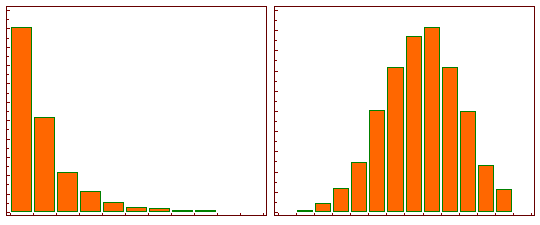


    
https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899

https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9

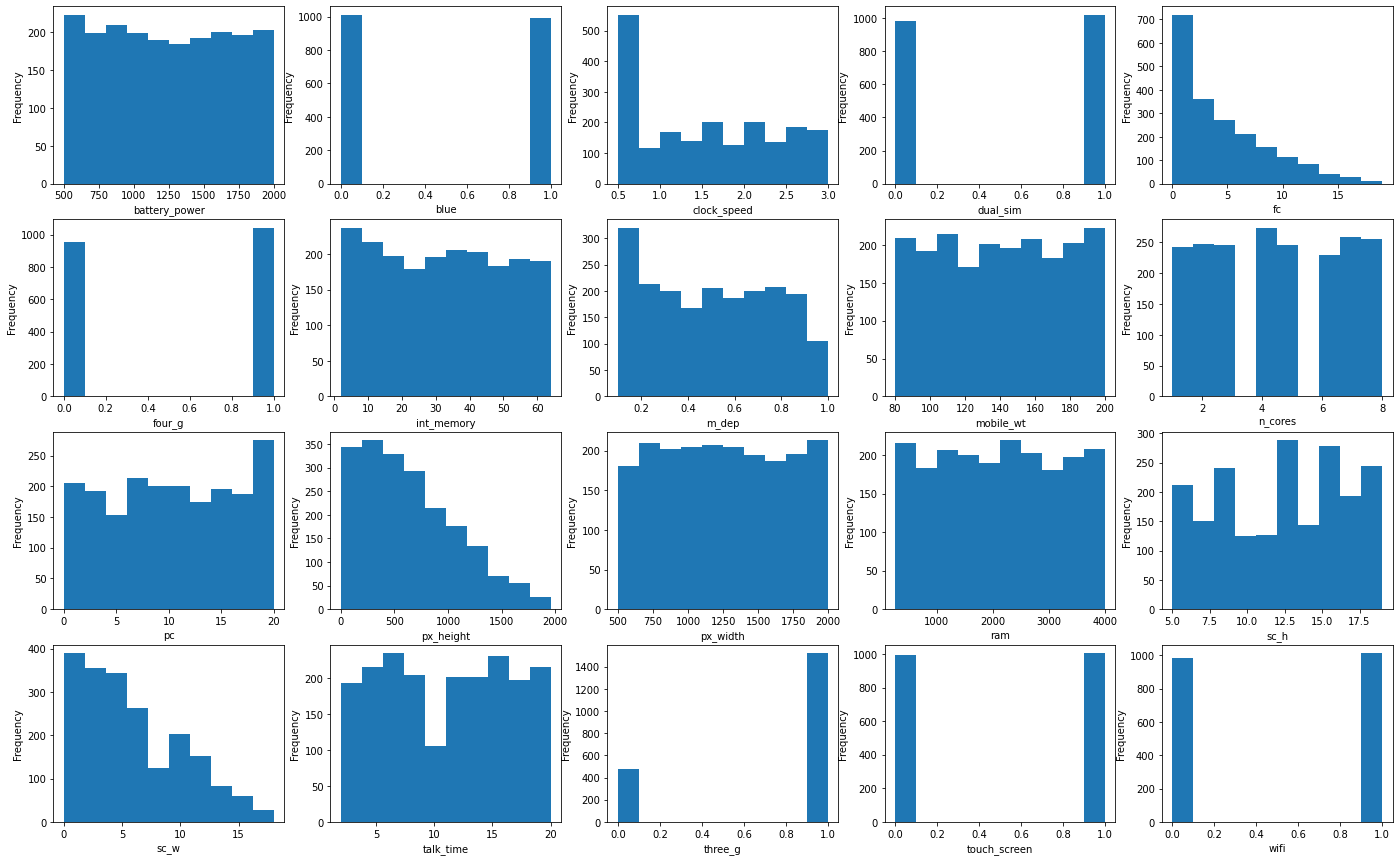

In [34]:
numeric_vars =  ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
       
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(4, 5, i + 1)
    sub.set_xlabel(var)
    df[var].plot(kind = 'hist')

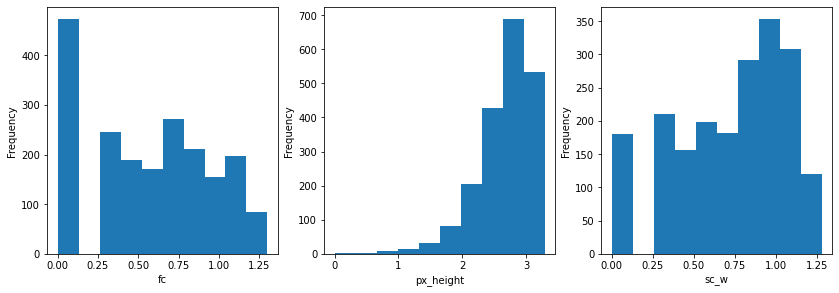

In [35]:
## log transformation - power law distribution
transformed_df = df.copy()
log_var = ['fc', 'px_height','sc_w']
fig = plt.figure(figsize = (24,10))
for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    transformed_df[transformed] = np.log10(df[var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    sub.set_xlabel(var)
    transformed_df[transformed].plot(kind = 'hist')

In [36]:
transformed_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,log_fc,log_px_height,log_sc_w
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,0.301030,1.322219,0.903090
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,0.000000,2.957128,0.602060
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,0.477121,3.101747,0.477121
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,0.000000,3.085291,0.954243
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,1.146128,3.082426,0.477121


In [37]:
#d.create area feature
df['sc_area'] = df['sc_h'] * df['sc_w']

In [38]:
df[['sc_h', 'sc_w' , 'sc_area']]

,sc_h,sc_w,sc_area
0,9,7,63
1,17,3,51
2,11,2,22
3,16,8,128
4,8,2,16
...,...,...,...
1995,13,4,52
1996,11,10,110
1997,9,1,9
1998,18,10,180


# Task 7
Train SVM Model

In [39]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,180


In [40]:
from sklearn.svm import SVC
svm = SVC()

In [41]:
#1.train svm without any feature engineering
X=df.drop(['price_range' ,'sc_area'], axis=1)
y=df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1302,1928,0,2.6,0,5,0,5,0.8,162,5,16,229,1004,696,14,12,15,1,1,1
146,1101,0,1.8,0,0,0,31,0.2,148,2,7,387,1269,2196,12,6,19,0,1,1
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1485,742,1,2.3,0,0,0,21,0.7,104,8,1,875,925,331,11,8,7,1,0,0
1905,1027,1,0.8,0,7,0,18,1.0,146,7,11,338,534,1234,7,4,14,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,989,1,1.8,1,4,1,55,0.7,124,1,12,46,1069,1737,8,5,10,1,0,1
1696,1890,0,1.1,0,4,1,48,0.5,127,4,5,1438,1832,2392,10,4,15,1,0,1
1872,1745,0,2.9,0,0,1,3,0.9,105,3,0,426,1629,1308,5,0,2,1,1,0
428,1197,0,1.3,0,3,1,20,0.5,149,6,7,649,1629,1797,19,5,4,1,1,1


In [42]:
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.95375
test accuracy: 0.965


In [43]:
#2.train svm after binning and one-hot encoding
X_encoded=encoded_df.drop(['price_range' , 'battery_power'], axis=1)
y=encoded_df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=50,stratify=y)
X_train

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,bin_battery_power_low,bin_battery_power_normal,bin_battery_power_high
132,0,0.5,0,1,0,41,1.0,197,7,10,...,2962,12,9,4,1,1,1,1,0,0
1020,0,0.5,1,0,1,23,0.4,164,4,1,...,3520,7,4,7,1,0,0,0,1,0
868,1,1.9,1,0,0,2,0.1,136,3,7,...,1539,19,12,19,0,0,0,0,1,0
1640,1,2.8,1,16,0,41,1.0,180,8,17,...,2341,10,9,16,0,0,1,0,1,0
263,0,1.5,0,4,0,28,0.7,175,4,10,...,527,10,0,15,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,1,2.5,0,10,1,15,0.3,107,8,11,...,2183,8,3,11,1,1,0,0,0,1
619,0,2.3,1,7,0,21,0.7,196,2,10,...,3293,8,4,7,1,0,1,1,0,0
276,0,0.5,0,0,1,61,0.8,126,4,13,...,3760,9,5,13,1,1,1,0,0,1
788,0,1.1,0,12,1,2,0.2,187,1,15,...,2487,13,12,16,1,1,1,0,0,1


In [44]:
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.805625
test accuracy: 0.805


In [45]:
#3.train svm after log transformation
X_transformed=transformed_df.drop(['price_range' , 'fc' ,	'px_height' , 'sc_w'], axis=1)
y=transformed_df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=50,stratify=y)
X_train

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,talk_time,three_g,touch_screen,wifi,log_fc,log_px_height,log_sc_w
132,645,0,0.5,0,0,41,1.0,197,7,10,580,2962,12,4,1,1,1,0.301030,2.515874,1.000000
1020,1119,0,0.5,1,1,23,0.4,164,4,1,915,3520,7,7,1,0,0,0.000000,2.914872,0.698970
868,981,1,1.9,1,0,2,0.1,136,3,7,688,1539,19,19,0,0,0,0.000000,1.880814,1.113943
1640,1269,1,2.8,1,0,41,1.0,180,8,17,1036,2341,10,16,0,0,1,1.230449,2.609594,1.000000
263,767,0,1.5,0,0,28,0.7,175,4,10,1517,527,10,15,0,1,0,0.698970,2.537819,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,1762,1,2.5,0,1,15,0.3,107,8,11,1364,2183,8,11,1,1,0,1.041393,3.042969,0.602060
619,598,0,2.3,1,0,21,0.7,196,2,10,1173,3293,8,7,1,0,1,0.903090,2.833147,0.698970
276,1662,0,0.5,0,1,61,0.8,126,4,13,1509,3760,9,13,1,1,1,0.000000,1.518514,0.778151
788,1501,0,1.1,0,1,2,0.2,187,1,15,1056,2487,13,16,1,1,1,1.113943,2.298853,1.113943


In [46]:
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.894375
test accuracy: 0.9225


In [47]:
#4.train svm after creating area feature
X_a=df.drop(['price_range'], axis=1)
y=df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X_a,y,test_size=0.2,random_state=50,stratify=y)
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,sc_area
132,645,0,0.5,0,1,0,41,1.0,197,7,...,327,580,2962,12,9,4,1,1,1,108
1020,1119,0,0.5,1,0,1,23,0.4,164,4,...,821,915,3520,7,4,7,1,0,0,28
868,981,1,1.9,1,0,0,2,0.1,136,3,...,75,688,1539,19,12,19,0,0,0,228
1640,1269,1,2.8,1,16,0,41,1.0,180,8,...,406,1036,2341,10,9,16,0,0,1,90
263,767,0,1.5,0,4,0,28,0.7,175,4,...,344,1517,527,10,0,15,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,1762,1,2.5,0,10,1,15,0.3,107,8,...,1103,1364,2183,8,3,11,1,1,0,24
619,598,0,2.3,1,7,0,21,0.7,196,2,...,680,1173,3293,8,4,7,1,0,1,32
276,1662,0,0.5,0,0,1,61,0.8,126,4,...,32,1509,3760,9,5,13,1,1,1,45
788,1501,0,1.1,0,12,1,2,0.2,187,1,...,198,1056,2487,13,12,16,1,1,1,156


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.955
test accuracy: 0.945


In [50]:
#5.train svm with all changes in task 6
bin = encoded_df[['bin_battery_power_low' , 'bin_battery_power_normal' ,'bin_battery_power_high']]
transform = transformed_df[['log_fc' ,	'log_px_height' ,	'log_sc_w']]

df = df.join(bin)
df = df.join(transform)
X = df.drop(['price_range' , 'battery_power' , 'fc' ,	'px_height' , 'sc_w'], axis=1)
y=df['price_range']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
X_train

,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,...,three_g,touch_screen,wifi,sc_area,bin_battery_power_low,bin_battery_power_normal,bin_battery_power_high,log_fc,log_px_height,log_sc_w
132,0,0.5,0,0,41,1.0,197,7,10,580,...,1,1,1,108,1,0,0,0.301030,2.515874,1.000000
1020,0,0.5,1,1,23,0.4,164,4,1,915,...,1,0,0,28,0,1,0,0.000000,2.914872,0.698970
868,1,1.9,1,0,2,0.1,136,3,7,688,...,0,0,0,228,0,1,0,0.000000,1.880814,1.113943
1640,1,2.8,1,0,41,1.0,180,8,17,1036,...,0,0,1,90,0,1,0,1.230449,2.609594,1.000000
263,0,1.5,0,0,28,0.7,175,4,10,1517,...,0,1,0,0,1,0,0,0.698970,2.537819,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,1,2.5,0,1,15,0.3,107,8,11,1364,...,1,1,0,24,0,0,1,1.041393,3.042969,0.602060
619,0,2.3,1,0,21,0.7,196,2,10,1173,...,1,0,1,32,1,0,0,0.903090,2.833147,0.698970
276,0,0.5,0,1,61,0.8,126,4,13,1509,...,1,1,1,45,0,0,1,0.000000,1.518514,0.778151
788,0,1.1,0,1,2,0.2,187,1,15,1056,...,1,1,1,156,0,0,1,1.113943,2.298853,1.113943


In [51]:
svm.fit(X_train,y_train)
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.77875
test accuracy: 0.815


#Task 8

Bootstrapping

**What is bootstrapping? and What is difference between bootstrapping and cross validation?**

Both cross validation and bootstrapping are resampling methods.

* **bootstrap** resamples with replacement (and usually produces new "surrogate" datasets with the same number of cases as the original data set). Due to the drawing with replacement, a bootstrapped data set may contain multiple instances of the same original cases, and may completely omit other original cases. 

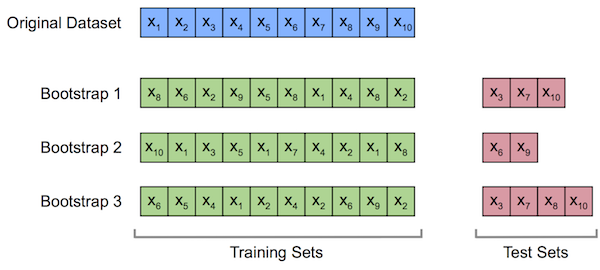

* **cross validation** resamples without replacement and thus produces surrogate data sets that are smaller than the original. These data sets are produced in a systematic way so that after a pre-specified number k of surrogate data sets, each of the n original cases has been left out exactly once. This is called k-fold cross validation or leave-x-out cross validation with x=n/k, e.g. leave-one-out cross validation omits 1 case for each surrogate set, i.e. k=n.


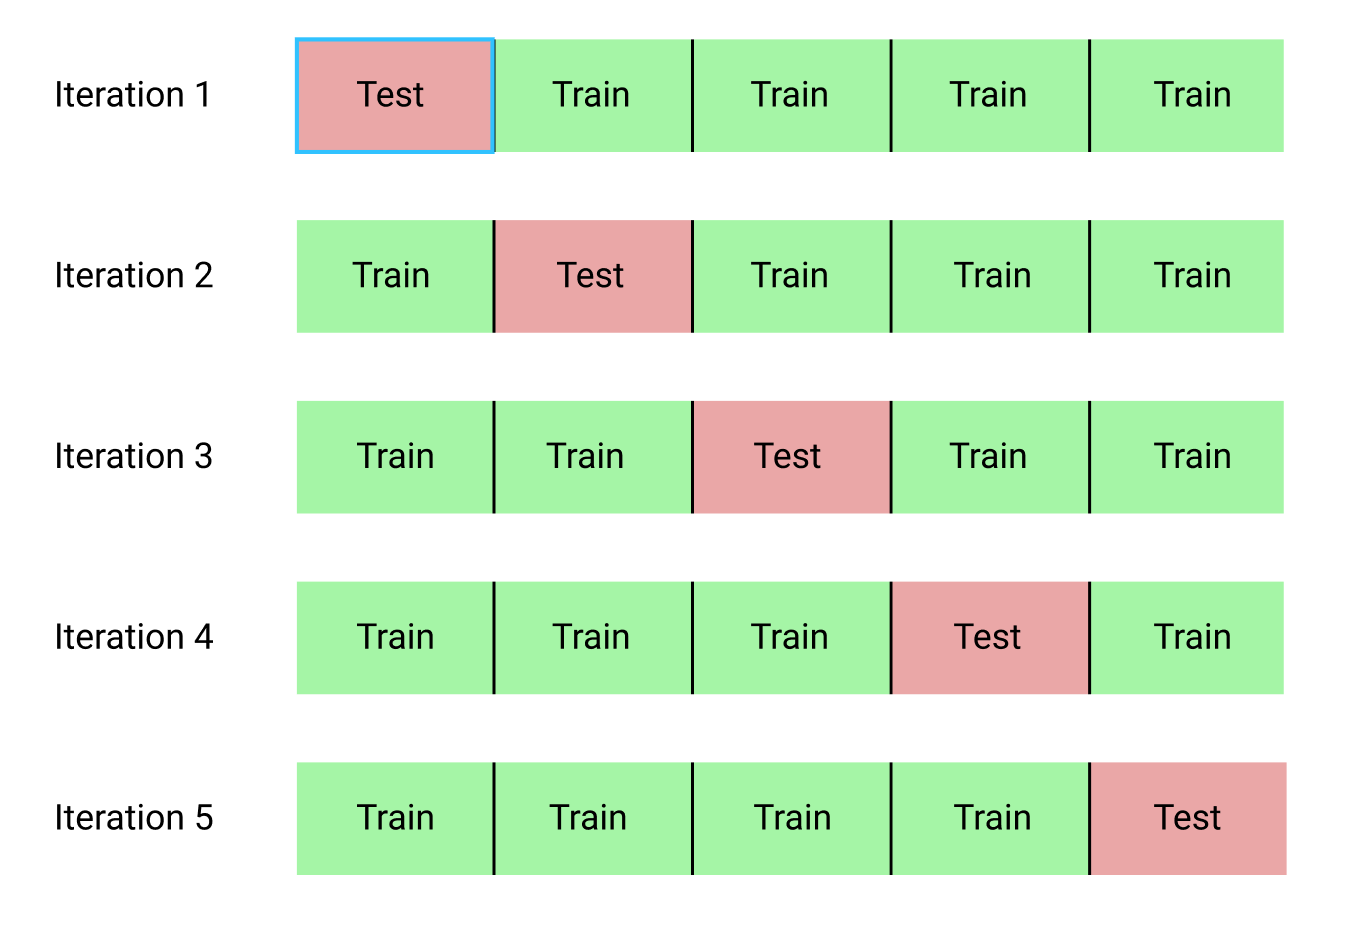


**when should we use bootstrappig?**

Bootstrap sampling is used in a machine learning ensemble algorithm called bootstrap aggregating. It helps in *avoiding overfitting* and *improves the stability* of machine learning algorithms.

# Task 9

5*2 cross validation

**What is 5x2 cross-validation and what is the usage?**



The 5x2cv was popularised by the paper Approximate statistical tests for comparing supervised classification learning algorithms by Dietterich as a way of obtaining not only a good estimate of the generalisation error but also a good estimate of the variance of that error (in order to perform statistical tests)

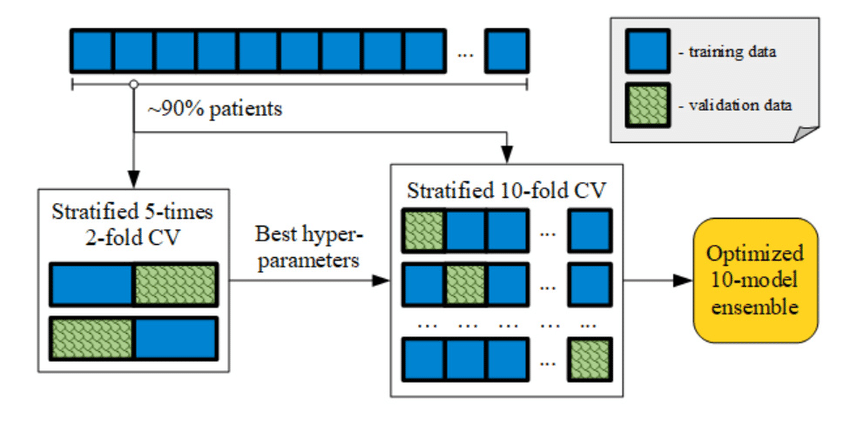

# Task 10

Elbow Method





**what is Elbow Method?**

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

**Does elbow method always work?**

However, the elbow method doesn't always work well; especially if the data is not very clustered. Notice how the elbow chart for Dataset B does not have a clear elbow. Instead, we see a fairly smooth curve, and it's unclear what is the best value of k to choose.


What is bias?

Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

Bias Error

*Low Bias: Suggests less assumptions about the form of the target function.*

*High-Bias: Suggests more assumptions about the form of the target function.*

What is variance?

Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

Variance Error

*Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset.*

*High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset.*


**For clean and large enough dataset:**

* The greater the model complexity the lower the estimation error, the better the approximation.
* The greater the model complexity the lower the bias
* The greater the model complexity the lower the variance

**For noisy dataset:**

* Greater model complexity doesn’t mean lower estimation error
* The greater the model complexity the lower the bias
* The greater the model complexity the higher the variance

Since the dataset in the real world is almost always noisy and limited, hence we need to find the optimum complexity of the underlying model that gives us the minimum error on the dataset. **Higher complexity doesn’t guarantee the best fit.**

https://bl.ocks.org/rpgove/0060ff3b656618e9136b

https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

# Extra

backward selection


In [52]:
combined_df = tmp_df.copy()
combined_df['price_range'] = combined_df['price_range'].replace([0,1],1)
combined_df['price_range'] = combined_df['price_range'].replace([2,3],2)
combined_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,1
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,2
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,1


In [53]:
X=combined_df.drop(['price_range'], axis=1)
y=combined_df['price_range']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50,stratify=y)
y_train

889     1
702     1
768     2
399     2
764     2
       ..
1960    2
436     2
226     2
266     2
1764    2
Name: price_range, Length: 1600, dtype: int64

In [55]:
def backward_selection(X_train, y_train, X_test, y_test, all_cols):
  selected_features = all_cols
  remain_cols = all_cols
  init_auc = 0
  for f in all_cols:
    
    worst_col = ''
    for col in selected_features:
      selected_features.remove(col)

      X_train_b = pd.DataFrame(data = X_train, columns = selected_features)
      X_test_b = pd.DataFrame(data = X_test, columns = selected_features)

      auc = LR(X_train_b, y_train, X_test_b, y_test)
      
      if auc > init_auc:
          init_auc = auc
          worst_col = col

      selected_features.append(col)
    
    if worst_col: 
      selected_features.remove(worst_col)

  return(selected_features, init_auc)

In [56]:
all_cols = X.columns.to_list()
backward_col , auc = backward_selection(X_train, y_train, X_test, y_test, all_cols)
backward_col

['sc_h',
 'four_g',
 'wifi',
 'dual_sim',
 'talk_time',
 'blue',
 'three_g',
 'm_dep',
 'battery_power',
 'ram',
 'int_memory',
 'px_height',
 'mobile_wt',
 'n_cores',
 'touch_screen',
 'sc_w',
 'px_width',
 'clock_speed']

In [57]:
auc

0.9975

In [58]:
X_train_b = X_train[backward_col]
X_test_b = X_test[backward_col]

In [59]:
LR_model = LR_model.fit(X_train_b, y_train)
y_pred = LR_model.predict(X_test_b)
score = precision_recall_fscore_support(y_test, y_pred)
print(' precision = ' , score[0][0] ,'\n recall = ' , score[1][0],'\n f1_score = ' , score[2][0])

 precision =  0.9950248756218906 
 recall =  1.0 
 f1_score =  0.9975062344139651


# Statistical Significance Tests

**How can we compare models by using Statistical Significance Test?**

1. Independent Data Samples

If you have near unlimited data, gather k separate train and test datasets to calculate 10 truly independent skill scores for each method.

You may then correctly apply the paired Student’s t-test. This is most unlikely as we are often working with small data samples.

2. Accept the Problems of 10-fold CV

The naive 10-fold cross-validation can be used with an unmodified paired Student t-test can be used.

It has good repeatability relative to other methods and a modest type II error, but is known to have a high type I error.

3. Use McNemar’s Test or 5×2 CV

The two-decade long recommendations of McNemar’s test for single-run classification accuracy results and 5×2-fold cross-validation with a modified paired Student’s t-test in general stand.

Further, the Nadeau and Bengio further correction to the test statistic may be used with the 5×2-fold cross validation or 10×10-fold cross-validation as recommended by the developers of Weka.

4. Use a Nonparametric Paired Test

We can use a nonparametric test that makes fewer assumptions, such as not assuming that the distribution of the skill scores is Gaussian.

One example is the Wilcoxon signed-rank test, which is the nonparametric version of the paired Student’s t-test. This test has less statistical power than the paired t-test, although more power when the expectations of the t-test are violated, such as independence.

5. Use Estimation Statistics Instead

Instead of statistical hypothesis tests, estimation statistics can be calculated, such as confidence intervals. These would suffer from similar problems where the assumption of independence is violated given the resampling methods by which the models are evaluated.

**what is Matthews's correlation coefficient?**

Matthew’s correlation coefficient, also abbreviated as MCC was invented by Brian Matthews in 1975. MCC is a statistical tool used for model evaluation. Its job is to gauge or measure the difference between the predicted values and actual values and is equivalent to chi-square statistics for a 2 x 2 contingency table. 

To evaluate binary classifications and their confusion matrices, scientific researchers can employ several statistical rates, accordingly to the goal of the experiment they are investigating. Despite being a crucial issue in machine learning, no widespread consensus has been reached on a unified elective chosen measure yet. Accuracy and F1 score computed on confusion matrices have been (and still are) among the most popular adopted metrics in binary classification tasks. However, these statistical measures can dangerously show overoptimistic inflated results, especially on imbalanced datasets.

The **Matthews correlation coefficient** (MCC), instead, is a more reliable statistical rate that produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.